In [293]:
run def2.py

In [294]:
# Ler das imagens para uma matriz 'X' e um array 'lista'
X, lista, size = readImages()
size

18

In [295]:
X[1].shape

(65025,)

In [296]:
X.shape

(18, 65025)

In [305]:
# Obter os vectores pp de acordo com um certo nivel de confianca
eigenvalues, eigenvectors, phi, mean, variance = pca(X, 5, 1)
eigenvalues

17


array([1.05875458e+09, 1.89960686e+08, 1.67053215e+08, 1.07758113e+08,
       7.64213529e+07, 5.06665192e+07, 4.26659263e+07, 3.06913381e+07,
       2.80590375e+07, 2.33780940e+07, 2.00415776e+07, 1.56021338e+07,
       1.28909699e+07, 9.36606907e+06, 8.42193325e+06, 7.06221035e+06,
       5.97287818e+06, 6.89588851e-22])

In [306]:
#plt.figure(figsize=(10,10))
#t = np.arange(0, size, 1)
#plt.plot(t, eigenvalues, 'x')
#plt.plot(5, eigenvalues[5], 'o')
#plt.show()

In [307]:
eigenvectors.T[0]

array([-0.00059673, -0.0005939 , -0.00058761, ...,  0.00347165,
        0.00335092,  0.00317014])

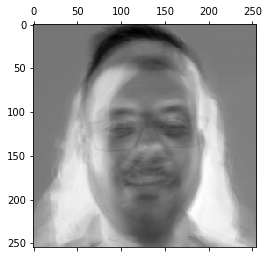

In [308]:
# Exemplo de uma eigenface do dataset
display(plt.matshow(np.reshape(eigenvectors.T[0], (255,255)), cmap='gray'))

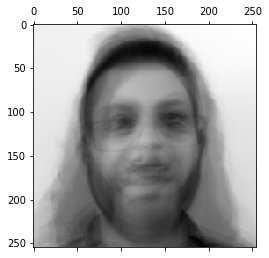

In [309]:
# Exemplo da "cara m√©dia" do dataset
display(plt.matshow(np.reshape(mean, (255,255)), cmap='gray'))

In [310]:
# Obter os coeficientes das projeccoes das eigenfaces
coef_proj = coefProj(phi, eigenvectors, X.shape[0])
coef_proj

array([[-8.98046194e+03,  6.68892047e+02,  3.35818559e+03,
         2.79870678e+03, -2.07730862e+03, -9.74680549e+03,
         6.12615166e+02,  3.72754495e+03,  2.64357299e+03,
        -1.12207780e+03, -9.65501973e+03,  9.34225325e+02,
         4.05778242e+03,  2.64916632e+03, -1.50870873e+03,
         9.70307655e+03,  3.23933616e+03,  3.38998001e+03],
       [-1.79929064e+03,  9.56917439e+02,  8.84187789e+03,
         2.94392690e+03,  3.78207885e+03, -1.23482282e+03,
         2.24451200e+03,  9.16498393e+03,  3.07133301e+03,
         3.82329142e+03, -1.37761383e+03,  1.99666346e+03,
         5.65822775e+03, -3.99130476e+03, -1.97859274e+03,
         3.11849824e+03,  1.53978592e+03,  4.47048271e+03],
       [-3.47355154e+03, -1.57375477e+03,  2.96722284e+03,
         1.91123935e+03,  5.41880170e+03, -4.26755937e+03,
        -1.33542381e+03,  3.86386979e+03,  2.32794616e+03,
        -2.34983042e+03,  5.20186282e+03, -3.89337189e+03,
         4.45626909e+02, -1.81077638e+02, -3.57873918e

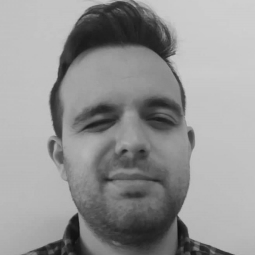

In [311]:
# Imagem para teste
input_img = Image.open('tiago_wink.gif').convert('L')
input_img

In [312]:
# Teste do reconhecimento
test_coef_proj = testar(input_img, mean, eigenvectors, eigenvalues, 39000, X.shape[0], coef_proj)

[2.71148549e+08 2.90270285e+04 9.35414541e+06 1.16979491e+06
 5.04511658e+06]
[46474691.6310166   8564877.99684619  1342488.2863392   7614817.90594412
  1893489.30809806]
[1.70398998e+07 1.16889435e+08 1.14400861e+07 3.14062088e+07
 5.56483955e+05]
[21971907.77481498 24143373.94166616  5411839.88706041 18107789.59811626
 40634124.30489211]
[91459299.8461148  33082544.01584287 34034371.76312087  1677252.43967518
  7890107.6788988 ]
[2.96973960e+08 5.39991324e+05 1.48414679e+07 2.56078521e+06
 9.72094395e+06]
[47245164.15170816 17759277.9885646    847001.80878388 77481270.81607793
  1244558.24475838]
[1.41269386e+07 1.23980381e+08 1.83095551e+07 6.43005301e+05
 2.50526842e+07]
[23450328.75572793 25411649.22774475  7524284.7074067    363199.04795874
 37083312.40813388]
[7.41011889e+07 3.35583306e+07 3.74319417e+06 2.26949233e+04
 3.83169992e+06]
[2.93818909e+08 3.50523212e+05 3.15502354e+07 8.02888348e+06
 4.14792215e+06]
[42927414.80707473 15731752.27779764 12098397.61616215 67269869.638

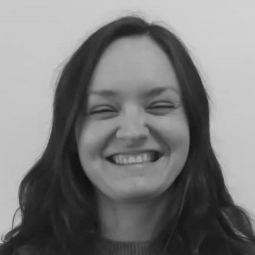

In [316]:
# Imagema que se assemelha no dataset
lista[15]

In [314]:
coef_proj=np.reshape(coef_proj, (5,19))
distance = np.sum(np.divide((coef_proj[:,4]-test_coef_proj)**2, eigenvalues[:5]))
distance

ValueError: cannot reshape array of size 90 into shape (5,19)

In [315]:
def mahalanobis(x, y, eigenvalues, k):
    if x.shape[0] != y.shape[0]:
        return (-1)
    N = x.shape[1]
    distance=[0]*N
    for i in range(N):
        distance[i] = [np.sum(np.divide((x[:,i]-y)**2, eigenvalues[:k]))]
    return distance

In [219]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
dist=[]
mahalanobis(coef_proj, test_coef_proj, eigenvalues, eigenvectors.shape[1])

[[1.2205762737094963],
 [1.0470248681931018],
 [0.8188953672865905],
 [0.6636286620438331],
 [1.197628977075607],
 [0.8820711788009045],
 [0.8246338707330036],
 [1.0956689840462457],
 [1.701767529376395],
 [0.7774818793651067],
 [1.2878956939180646],
 [1.0796533882260808],
 [0.6577974360710234],
 [1.7107367420721549],
 [0.9692304754120853],
 [0.15002705975156444],
 [0.45678533859084036],
 [0.5607612278508963],
 [0.6875326134831423]]

In [57]:
# Conclusoes: nao consegue reconhecer quando tem uma luz de lado. Caso contrario, faz bem o reconhecimento.